# Set up environment

In [2]:
import time
class Timer:
    def __init__(self):
        self.time1 = 0
        self.time2 = 0
        self.diff  = 0
        
    def start(self):
        self.time1 = time.time()
    
    def stop(self):
        self.time2 = time.time()
        self.diff = self.time2 - self.time1
        
    def report(self, niter = 1):
        val = self.diff / niter
        return val // 3600, val // 60 % 60, val % 60
timer = Timer()

In [3]:
import numpy as np
from collections import Counter

from keras import layers
from keras import models
from keras.utils import to_categorical

import matplotlib.pyplot as plt

/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Import results

In [4]:
!ls /data/deep-learning-group/test_data/flow_EQAPOL/

data_CMV.np	data_SEB.np  tsne_E3sub10.npz  tsne_img_E3sub10.npz
data_Costim.np	markers.np   tsne_E4sub10.npz


```
np.savez(
    file_object, 
    data_samples = data_samples_E3sub10, 
    data_labels  = data_labels_E3sub10, 
    data_tsne    = data_tsne_E3sub10,
    data_img     = data_img_E3sub10)
```

In [5]:
# directory
datadir = "/data/deep-learning-group/test_data/flow_EQAPOL/"

# output the value
file_name = "tsne_img_E3sub10.npz"

# open the file for reading
file_object = open(datadir + file_name, 'rb') # wb --- write binary

# read data
data         = np.load(file_object)
data_samples = data["data_samples"]
data_labels  = data["data_labels"]
data_tsne    = data["data_tsne"]
data_img     = data["data_img"]
data_img     = np.moveaxis(data_img, 1, -1) # move axis

# close the file
file_object.close()

In [6]:
num_samples_tot, num_cells_tot, num_features = data_samples.shape

print("================")
print("Total Samples:         ", num_samples_tot)
print("Total cell in a sample:", num_cells_tot)
print("Number of features:    ", num_features)
print("================")
print("check dimension")
print("- Samples", data_samples.shape)
print("- Labels ", data_labels.shape)
print("- t-SNE  ", data_tsne.shape)
print("- Images ", data_img.shape)

print("================")
print("check labels")
print(Counter(data_labels))

Total Samples:          330
Total cell in a sample: 1000
Number of features:     14
check dimension
- Samples (330, 1000, 14)
- Labels  (330,)
- t-SNE   (330, 1000, 2)
- Images  (330, 128, 128, 14)
check labels
Counter({0: 110, 1: 110, 2: 110})


# Plot data

In [55]:
def plot_tsne_nocolor(ax, tsne, point_size = 2, alpha = 0.5):
    """plot plain"""
    x   = tsne[:, 0]
    y   = tsne[:, 1]
    ax.scatter(
        x, y, s=point_size, alpha=alpha)
    
def plot_tsne(ax, tsne, sample, idx_feature = 0, n_grid = 128, point_size = 2, alpha = 0.5):
    """plot tsne with color of a feature"""
    x   = tsne[:, 0]
    y   = tsne[:, 1]
    z   = sample[:, idx_feature]
    
    ax.scatter(
        x, y, c = z, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Reds'))
    
################################################    
# because the difference of dimension
def plot_img(ax, tsne, img, idx_feature = 0, n_grid = 128, point_size = 2, alpha = 0.5):
    """plot images created from tsne"""
    x   = tsne[:, 0]
    y   = tsne[:, 1]
    x_c = np.linspace(min(x), max(x), n_grid)
    y_c = np.linspace(min(y), max(y), n_grid)
    x_c, y_c = np.meshgrid(x_c, y_c)
    z_c = img[:, :, idx_feature] # z_c = img[idx_feature]
    
    ax.scatter(
        x_c, y_c, c = z_c, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Blues'))

In [9]:
data_labels.shape

(330,)

In [8]:
data_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

```
330 / 33 = 10
Costim:   0-110
CMV:    111-221
SEB:    222-332
```

In [96]:
idx = [0, 11, 222, 233]
#idx = [0, 1]

samples    = data_samples[idx]
tsne_plots = data_tsne[idx]
images     = data_img[idx]
labels     = data_labels[idx]

print(labels.shape)
print(samples.shape)
print(tsne_plots.shape)
print(images.shape)

(4,)
(4, 1000, 14)
(4, 1000, 2)
(4, 128, 128, 14)


In [98]:
markers

NameError: name 'markers' is not defined

[0 0 2 2]


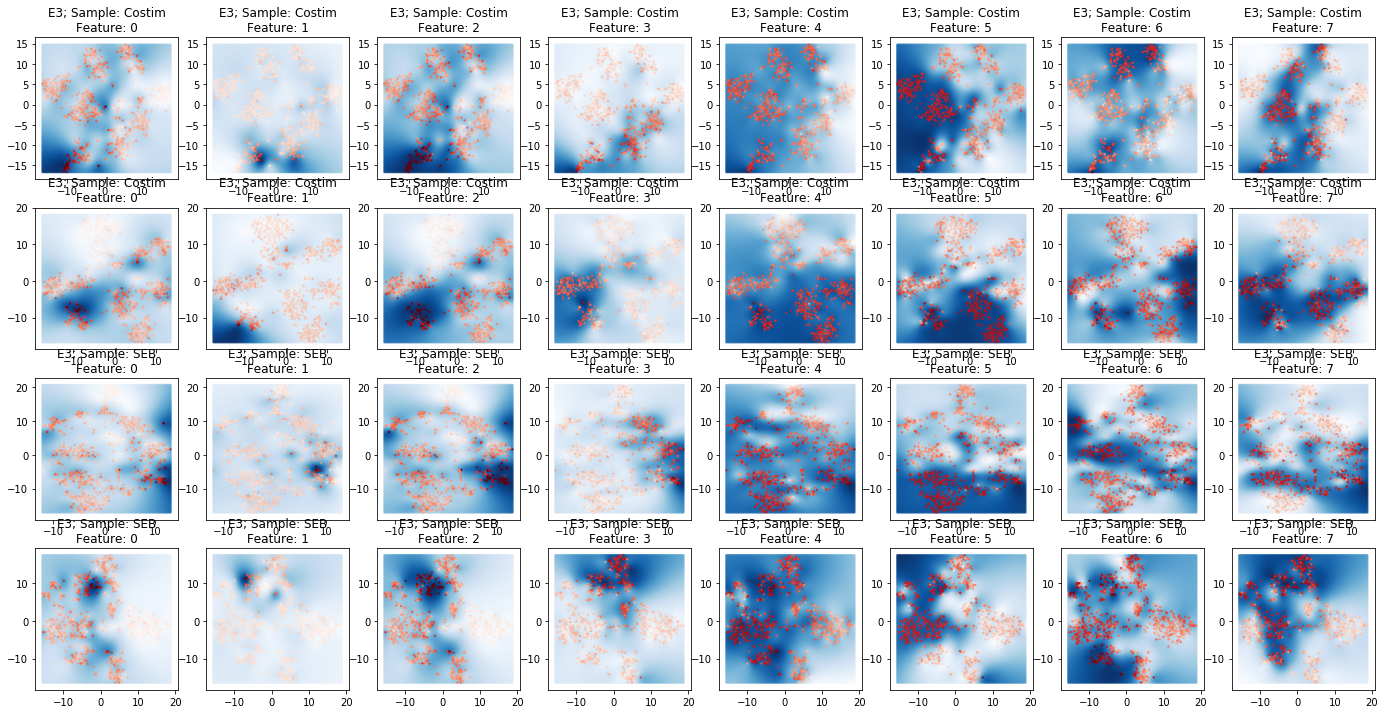

In [97]:
nrow, ncol = 4, 8
fig, axes = plt.subplots(nrow, ncol, figsize = (ncol * 3, nrow * 3))
titles = ["Costim", "Costim", "SEB", "SEB"]

print(labels)

for idx1 in range(nrow):
    sample = samples[idx1]
    tsne   = tsne_plots[idx1]
    img    = images[idx1]
    #print(sample.shape)
    #print(tsne.shape)
    #print(img.shape)
    
    for idx2 in range(ncol):
        ax     = axes[idx1, idx2]
        plot_img( ax, tsne, img, idx_feature = idx2)
        plot_tsne(ax, tsne, sample, idx_feature = idx2, alpha=0.6)
        ax.set_title("E3; Sample: " + titles[idx1] + "\n" + "Feature: " + str(idx2))
    
plt.show()

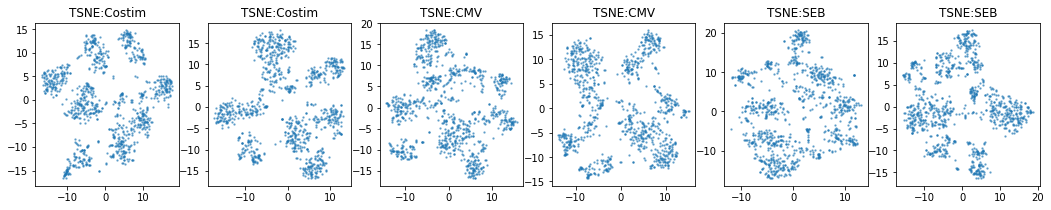

In [85]:
nrow, ncol = 1, 6
fig, axes = plt.subplots(nrow, ncol, figsize = (ncol * 3, nrow * 3))
titles = ["Costim", "Costim", "CMV", "CMV", "SEB", "SEB"]

#print(labels)

for idx1 in range(ncol):
    tsne   = tsne_plots[idx1]
    ax     = axes[idx1]
    plot_tsne_nocolor(ax, tsne)
    ax.set_title("TSNE:" + titles[idx1])
    
plt.show()

### original code

In [31]:
def plot_tsne_img(ax, sample, tsne, img, n_grid = 128, point_size = 2, alpha = 0.5):
    x   = tsne[:, 0]
    y   = tsne[:, 1]
    z   = sample[:, 0]

    x_c = np.linspace(min(x), max(x), n_grid)
    y_c = np.linspace(min(y), max(y), n_grid)
    x_c, y_c = np.meshgrid(x_c, y_c)
    z_c = img

    ax.scatter(
        x_c, y_c, c = z_c, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Blues'))
    
    ax.scatter(
        x, y, c = z, 
        s=point_size, alpha=alpha, 
        cmap=plt.get_cmap('Reds'))

[0 0]


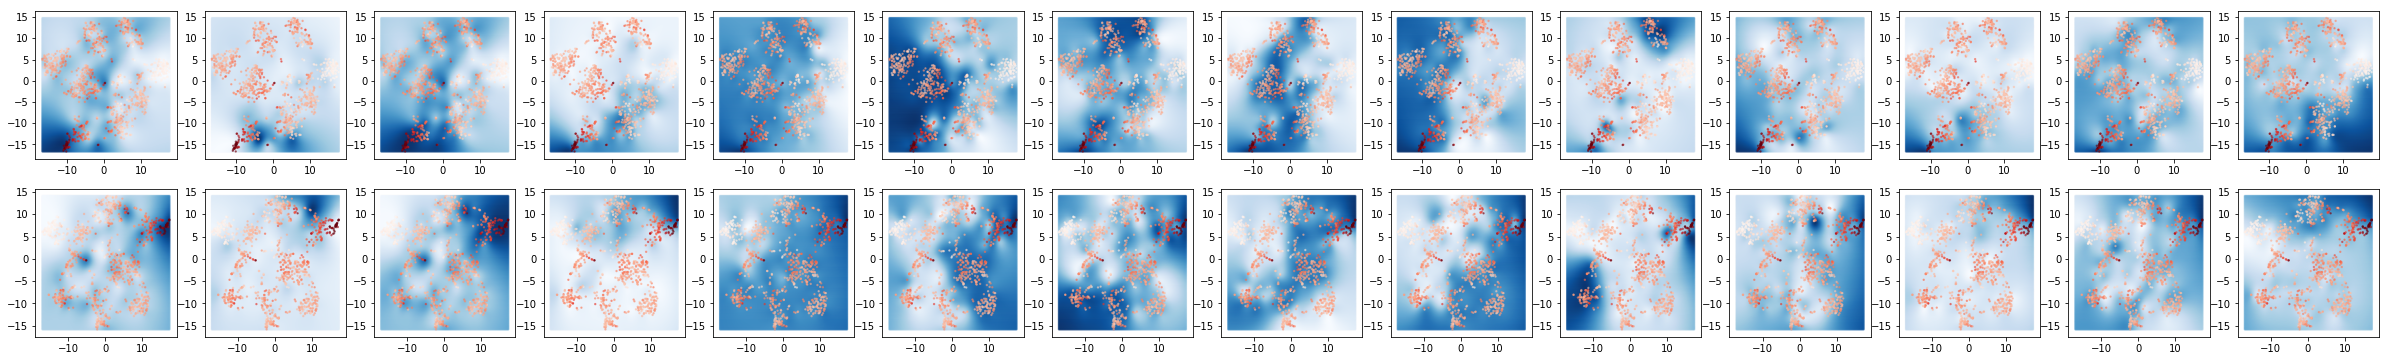

In [36]:
n1, n2 = 2, 14
fig_width = 3
fig1, axes1 = plt.subplots(n1, n2, figsize = (fig_width * n2, fig_width * n1))

# labels
print(data_labels[:n1])

# images
for idx_sample in range(n1):
    for idx_feature in range(n2):
        sample = data_samples[idx_sample]
        tsne   = data_tsne[idx_sample]
        img    = data_img[idx_sample, :, :, idx_feature]
       
        plot_tsne_img(axes1[idx_sample][idx_feature], sample, tsne, img)

        n1, n2 = 3, 14
plt.show()

# randomization

In [58]:
data_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [59]:
np.random.seed(0)
idx = np.random.permutation(range(num_samples_tot))

# randomly pick images
samples = data_samples[idx]
labels  = data_labels[idx]
tsnes   = data_tsne[idx]
images  = data_img[idx]

# standardize images
images = [(img - np.min(img)) / (np.max(img) - np.min(img)) for img in images]
images = np.array(images)
images.shape

(330, 128, 128, 14)

In [60]:
labels

array([1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1,

# (testing) randomization with label == 1

In [73]:
idx = np.where((data_labels == 0) | (data_labels == 2))
samples = data_samples[idx]
labels  = data_labels[idx]
tsnes   = data_tsne[idx]
images  = data_img[idx]

np.random.seed(0)
idx = np.random.permutation(range(len(labels)))

# randomly pick images
samples = samples[idx]
labels  = labels[idx]
tsnes   = tsnes[idx]
images  = images[idx]

# standardize images
images = [(img - np.min(img)) / (np.max(img) - np.min(img)) for img in images]
images = np.array(images)
images.shape

(220, 128, 128, 14)

In [74]:
labels

array([2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2])

# Divide plots to train and test

In [86]:
num_samples_tot = len(labels)
num_train = int(num_samples_tot * 0.7)
num_test  = num_samples_tot - num_train
print(num_train, num_test)

154 66


In [87]:
train_images = images[:num_train]
train_labels = labels[:num_train]
test_images  = images[num_train:]
test_labels  = labels[num_train:]

print("==========")
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)
print("++++++++++++++++++++++++++++")

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)

Train Data
- Image:  (154, 128, 128, 14)
- Label:  (154,)
Test Data
- Image:  (66, 128, 128, 14)
- Label:  (66,)
++++++++++++++++++++++++++++
Train Data
- Image:  (154, 128, 128, 14)
- Label:  (154, 3)
Test Data
- Image:  (66, 128, 128, 14)
- Label:  (66, 3)


# Build a Keras Conv2D model

In [88]:
# initialize a model
np.random.seed(0)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 14)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      4064      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3211328   
__________

In [78]:
timer.start()
#model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images[:1],
                    train_labels[:1],
                    epochs=2,
                    batch_size=2,
                    validation_data=(test_images, test_labels))
timer.stop()
timer.report()

Train on 1 samples, validate on 66 samples
Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 1.1700 - acc: 0.0000e+00 - val_loss: 2.3613 - val_acc: 0.5152
Epoch 2/2
1/1 [==============================] - 0s 279ms/step - loss: 0.0073 - acc: 1.0000 - val_loss: 7.8148 - val_acc: 0.5152


(0.0, 0.0, 3.1017539501190186)

In [19]:
timer.start()
history = model.fit(train_images[:10],
                    train_labels[:10],
                    epochs=2,
                    batch_size=2,
                    validation_data=(test_images, test_labels))
timer.stop()
timer.report()

Train on 10 samples, validate on 100 samples
Epoch 1/2
10/10 [==============================] - 1s 52ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 10.6379 - val_acc: 0.3400
Epoch 2/2
10/10 [==============================] - 0s 47ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 10.6379 - val_acc: 0.3400


(0.0, 0.0, 0.9873530864715576)

In [20]:
timer.start()
history = model.fit(train_images[:100],
                    train_labels[:100],
                    epochs=2,
                    batch_size=2,
                    validation_data=(test_images, test_labels))
timer.stop()
timer.report()

Train on 100 samples, validate on 100 samples
Epoch 1/2
100/100 [==============================] - 2s 24ms/step - loss: 10.7991 - acc: 0.3300 - val_loss: 10.6379 - val_acc: 0.3400
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 10.7991 - acc: 0.3300 - val_loss: 10.6379 - val_acc: 0.3400


(0.0, 0.0, 3.452453136444092)

In [89]:
timer.start()
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=2,
                    validation_data=(test_images, test_labels))
timer.stop()
timer.report()

Train on 154 samples, validate on 66 samples
Epoch 1/10
154/154 [==============================] - 2s 10ms/step - loss: 0.8772 - acc: 0.5195 - val_loss: 0.6943 - val_acc: 0.6364
Epoch 2/10
154/154 [==============================] - 1s 8ms/step - loss: 0.7821 - acc: 0.5909 - val_loss: 0.7004 - val_acc: 0.5606
Epoch 3/10
154/154 [==============================] - 1s 8ms/step - loss: 0.5198 - acc: 0.8182 - val_loss: 0.2193 - val_acc: 0.9697
Epoch 4/10
154/154 [==============================] - 1s 8ms/step - loss: 2.4358 - acc: 0.8182 - val_loss: 0.1124 - val_acc: 0.9697
Epoch 5/10
154/154 [==============================] - 1s 8ms/step - loss: 5.6689 - acc: 0.6039 - val_loss: 0.2589 - val_acc: 0.9091
Epoch 6/10
154/154 [==============================] - 1s 8ms/step - loss: 0.2987 - acc: 0.9481 - val_loss: 8.2087 - val_acc: 0.4848
Epoch 7/10
154/154 [==============================] - 1s 8ms/step - loss: 0.7596 - acc: 0.8571 - val_loss: 4.7937 - val_acc: 0.5152
Epoch 8/10
154/154 [==========

(0.0, 0.0, 13.296208143234253)

In [90]:
history.history

{'acc': [0.5194805194805194,
  0.5909090909090909,
  0.8181818181818182,
  0.8181818181818182,
  0.6038961038961039,
  0.948051948051948,
  0.8571428571428571,
  0.9415584415584416,
  0.9155844155844156,
  0.9090909090909091],
 'loss': [0.8771648705005646,
  0.7820869134935586,
  0.519773187458231,
  2.435808735557847,
  5.6688568106550665,
  0.29873225638181555,
  0.7595707302442603,
  0.559289940538747,
  0.6930531075299654,
  0.9482159963017782],
 'val_acc': [0.6363636363636364,
  0.5606060606060606,
  0.9696969696969697,
  0.9696969696969697,
  0.9090909090909091,
  0.48484848484848486,
  0.5151515151515151,
  0.9696969696969697,
  0.9696969696969697,
  0.8939393939393939],
 'val_loss': [0.6943155075564529,
  0.7004253503048059,
  0.2192573522280606,
  0.11241991934059871,
  0.2589453680698308,
  8.208651325919414,
  4.793685783039443,
  0.12142444302510526,
  0.22193398208366125,
  0.47655729884160947]}

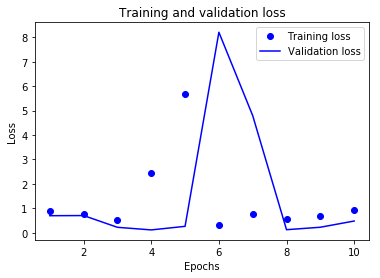

In [92]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Test Second Models

In [93]:
# initialize a model
np.random.seed(0)
#np.random.seed(11)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 14)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      4064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [94]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=2,
                    validation_data=(test_images, test_labels))

Train on 154 samples, validate on 66 samples
Epoch 1/10
154/154 [==============================] - 1s 7ms/step - loss: 8.1826 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 6/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 7/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 8/10
154/154 [===========

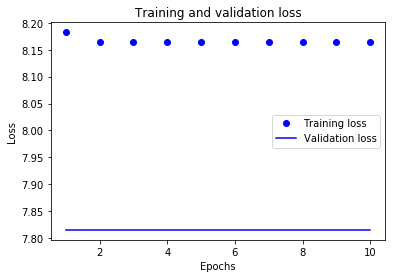

In [95]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Question: is it able to figure label 1 and 3

In [55]:
num_train = int(num_samples_tot_red * 0.7)
num_test  = num_samples_tot_red - num_train
print(num_train, num_test)

154 66


In [57]:
train_images = images_red[:num_train]
train_labels = labels_red[:num_train]
test_images  = images_red[num_train:]
test_labels  = labels_red[num_train:]

print("==========")
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)
print("++++++++++++++++++++++++++++")

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)
print("Train Data")
print("- Image: ", train_images.shape)
print("- Label: ", train_labels.shape)
print("==========")
print("Test Data")
print("- Image: ", test_images.shape)
print("- Label: ", test_labels.shape)

Train Data
- Image:  (154, 128, 128, 14)
- Label:  (154,)
Test Data
- Image:  (66, 128, 128, 14)
- Label:  (66,)
++++++++++++++++++++++++++++
Train Data
- Image:  (154, 128, 128, 14)
- Label:  (154, 3)
Test Data
- Image:  (66, 128, 128, 14)
- Label:  (66, 3)


In [58]:
# initialize a model
np.random.seed(0)
#np.random.seed(11)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 14)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 126, 126, 32)      4064      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [59]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=2,
                    validation_data=(test_images, test_labels))

Train on 154 samples, validate on 66 samples
Epoch 1/10
154/154 [==============================] - 1s 7ms/step - loss: 8.1826 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 6/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 7/10
154/154 [==============================] - 1s 6ms/step - loss: 8.1637 - acc: 0.4935 - val_loss: 7.8148 - val_acc: 0.5152
Epoch 8/10
154/154 [===========

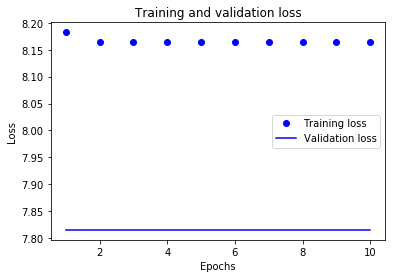

In [60]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

overfitting is used to explain test data

# Separable Conv2D (Try one layer only)

```
layers.SeparableConvolution2D?
layers.SeparableConv2D?
```

In [22]:
# initialize a model
np.random.seed(0)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), data_format='channels_last'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 126, 126, 32)      155       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                15241280  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 15,260,061
Trainable params: 15,260,061
Non-trainable params: 0
________________________________________________________________

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 4.3991 - acc: 0.6733 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 8/20
600/600 [==========

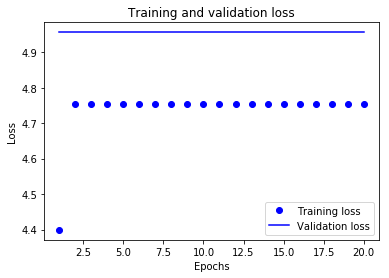

In [23]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Separable Conv2D (Try more layers)

In [17]:
# initialize a model
np.random.seed(11)
model = models.Sequential()

# Convolution & Pooling Layers
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), data_format='channels_last'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', data_format='channels_last'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', data_format='channels_last'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 126, 126, 32)      155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 61, 61, 64)        2400      
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                15241280  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 15,243,965
Trainable params: 15,243,965
Non-trainable params: 0
________________________________________________________________

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 2/20
600/600 [==============================] - 1s 899us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 3/20
600/600 [==============================] - 1s 906us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 4/20
600/600 [==============================] - 1s 892us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 5/20
600/600 [==============================] - 1s 891us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 6/20
600/600 [==============================] - 1s 894us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 7/20
600/600 [==============================] - 1s 901us/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 8/20
600/600

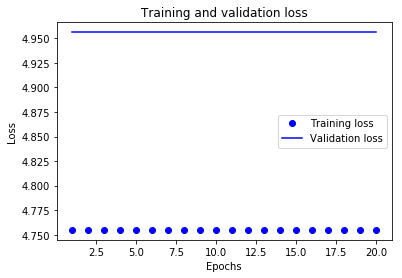

In [23]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# VGG16
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [32]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

from keras.applications.vgg16 import VGG16

In [46]:
model_vgg16_conv = VGG16(weights=None, include_top=False, input_shape=(128, 128, 3))
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [47]:
#Create your own input format (here 3x200x200)
input = Input(shape=(128,128, 3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(2, activation='softmax', name='predictions')(x)

#Create your own model 
model = Model(input=input, output=x)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              33558528  
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 2)                 8194      
Total params: 65,062,722
Trainable params: 65,062,722
Non-trainable params: 0
________________________________________________________________

/local_data/env-py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  


Train on 600 samples, validate on 400 samples
Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 4.4795 - acc: 0.6900 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 4.7548 - acc: 0.7050 - val_loss: 4.9563 - val_acc: 0.6925


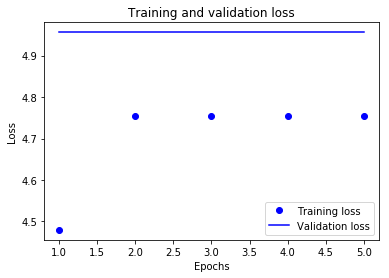

In [48]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Xception

In [38]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

from keras.applications.xception import Xception

In [43]:
model_conv = Xception(weights=None, include_top=False)
model_conv.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [44]:
#Create your own input format (here 3x200x200)
input = Input(shape=(128,128, 3),name = 'image_input')

#Use the generated model 
output_conv = model_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(2, activation='softmax', name='predictions')(x)

#Create your own model 
model = Model(input=input, output=x)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 128, 128, 3)       0         
_________________________________________________________________
xception (Model)             multiple                  20861480  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              134221824 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 2)                 8194      
Total params: 171,872,810
Trainable params: 171,818,282
Non-trainable params: 54,528
_________________________________________________________

/local_data/env-py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  


In [45]:
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 600 samples, validate on 400 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[64,8,8,728]
	 [[Node: xception_1/block10_sepconv1/separable_conv2d = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](xception_1/block10_sepconv1/separable_conv2d/depthwise, block10_sepconv1_1/pointwise_kernel/read)]]
	 [[Node: metrics_5/acc/Mean/_3803 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_17355_metrics_5/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'xception_1/block10_sepconv1/separable_conv2d', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/local_data/env-py3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/local_data/env-py3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/local_data/env-py3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/local_data/env-py3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/local_data/env-py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/local_data/env-py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/local_data/env-py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/local_data/env-py3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/local_data/env-py3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/local_data/env-py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/local_data/env-py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/local_data/env-py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-f030c50fe846>", line 5, in <module>
    output_conv = model_conv(input)
  File "/local_data/env-py3/lib/python3.6/site-packages/keras/engine/topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "/local_data/env-py3/lib/python3.6/site-packages/keras/engine/topology.py", line 2061, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "/local_data/env-py3/lib/python3.6/site-packages/keras/engine/topology.py", line 2212, in run_internal_graph
    output_tensors = _to_list(layer.call(computed_tensor, **kwargs))
  File "/local_data/env-py3/lib/python3.6/site-packages/keras/layers/convolutional.py", line 1221, in call
    dilation_rate=self.dilation_rate)
  File "/local_data/env-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3284, in separable_conv2d
    data_format=tf_data_format)
  File "/local_data/env-py3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py", line 497, in separable_conv2d
    name=name)
  File "/local_data/env-py3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, name=name)
  File "/local_data/env-py3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/local_data/env-py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/local_data/env-py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[64,8,8,728]
	 [[Node: xception_1/block10_sepconv1/separable_conv2d = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](xception_1/block10_sepconv1/separable_conv2d/depthwise, block10_sepconv1_1/pointwise_kernel/read)]]
	 [[Node: metrics_5/acc/Mean/_3803 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_17355_metrics_5/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


# Xception

https://keras.rstudio.com/reference/application_xception.html

https://keras.io/applications/#xception

```
keras.applications.xception.Xception(
    include_top=True, 
    weights='imagenet',  # weights 
                         #     NULL (random initialization), 
                         #     imagenet (ImageNet weights), or 
                         #     the path to the weights file to be loaded.
                         
    input_tensor=None, 
    
    input_shape=None,    # input_shape (optional) shape list, 
                         #     only to be specified if include_top is FALSE
                         
    pooling=None,        # pooling (Optional) pooling mode 
                         #     for feature extraction when include_top is FALSE
                         #     NULL
                         #     avg
                         #     max
    
    classes=1000)        # classes (optional) number of classes to classify images into, 
                         #     only to be specified if include_top is TRUE, and 
                         #     if no weights argument is specified.
```

In [69]:
#keras.applications.xception.Xception
from keras.applications.xception import Xception

In [70]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model = Xception(
    include_top = False,
    input_shape = (128, 128, 3),
    pooling     = "max",
    classes     = 2)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# model summary
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [71]:
# train model
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

ValueError: Error when checking target: expected global_max_pooling2d_2 to have shape (None, 2048) but got array with shape (600, 2)

I try to read some examples in the book

In [47]:
from keras import Input
from keras.models import Sequential, Model
from keras import layers

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Deep Learning with Python Page 248
from keras import layers
from keras import applications
from keras import Input
xception_base = applications.Xception(
    weights=None,
    include_top=False)
left_input      = Input(shape=(250, 250, 3))
right_input     = Input(shape=(250, 250, 3))
left_features   = xception_base(left_input)
right_input     = xception_base(right_input)
merged_features = layers.concatenate([left_features, right_input], axis=-1)

Try to build the model again

In [76]:
xception_base = Xception(
    weights=None,
    include_top=False)

input_tensor = Input(shape=(128, 128, 3))
x = xception_base(input_tensor)
output_tensor = layers.Dense(2, activation='softmax')(x)
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
xception (Model)             multiple                  20861480  
_________________________________________________________________
dense_18 (Dense)             (None, 4, 4, 2)           4098      
Total params: 20,865,578
Trainable params: 20,811,050
Non-trainable params: 54,528
_________________________________________________________________
None


In [77]:
# train model
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

ValueError: Error when checking target: expected dense_18 to have 4 dimensions, but got array with shape (600, 2)